In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import warnings
warnings.filterwarnings('ignore')

# common
import os
import os.path as op

# pip
import xarray as xr
import numpy as np

# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..', '..'))

# teslakit
from teslakit.database import Database
from teslakit.storms import Extract_Circle
from teslakit.mda import MaxDiss_Simplified_NoThreshold

from teslakit.plotting.storms import Plot_TCs_Params_MDAvsSIM, \
Plot_TCs_Params_HISTvsSIM, Plot_TCs_Params_HISTvsSIM_histogram, Plot_TCs_HistoricalTracks_Category, \
Plot_TCs_HistoricalTracks, Plot_TCs_SimTracks_Category



## Database and Site parameters

In [2]:
# --------------------------------------
# Teslakit database

p_data = r'/Users/laurac/Dropbox/Majuro_training/teslakit/DATA'
db = Database(p_data)

# set site
db.SetSite('MAJURO-training')

In [3]:
# --------------------------------------
# load data and set parameters

# wave point longitude and latitude
pnt_lon = 171.18
pnt_lat = 7.11

# radius for TCs selection (º)
r1 = 14
r2 = 4

# Load Nakajo simulations
TCs_Nakajo = db.Load_TCs_Nakajo()


In [4]:
# dictionary with needed variable names
d_vns = {
    'longitude':'ylon_TC',
    'latitude':'ylat_TC',
    'time': 'yts',
    'pressure':'yCPRES',
}

In [5]:
TCs_r1_sim_tracks, TCs_r1_sim_params = Extract_Circle(TCs_Nakajo, pnt_lon, pnt_lat, r1, d_vns)
TCs_r2_sim_tracks, TCs_r2_sim_params = Extract_Circle(TCs_Nakajo, pnt_lon, pnt_lat, r2, d_vns)

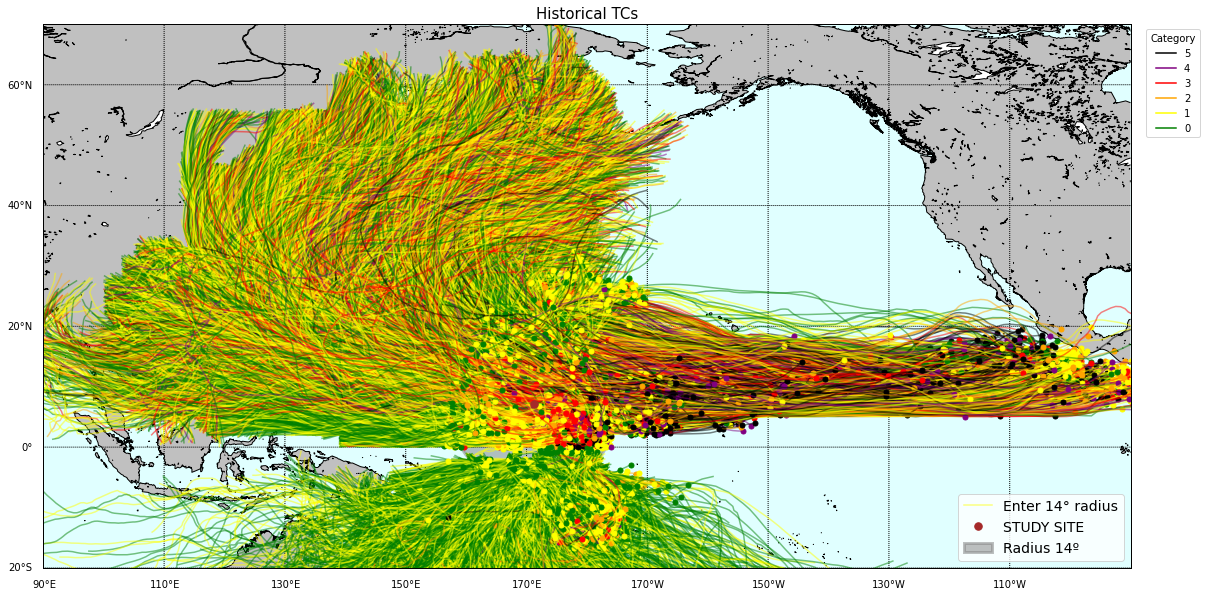

In [6]:
# Plot storm tracks category world map (requires basemap)

lon1, lon2 = 90, 270
lat1, lat2 = -20, 70

# r1
Plot_TCs_SimTracks_Category(
    TCs_r1_sim_tracks, TCs_r1_sim_params.category,
    lon1, lon2, lat1, lat2,
    pnt_lon, pnt_lat, r1,
);


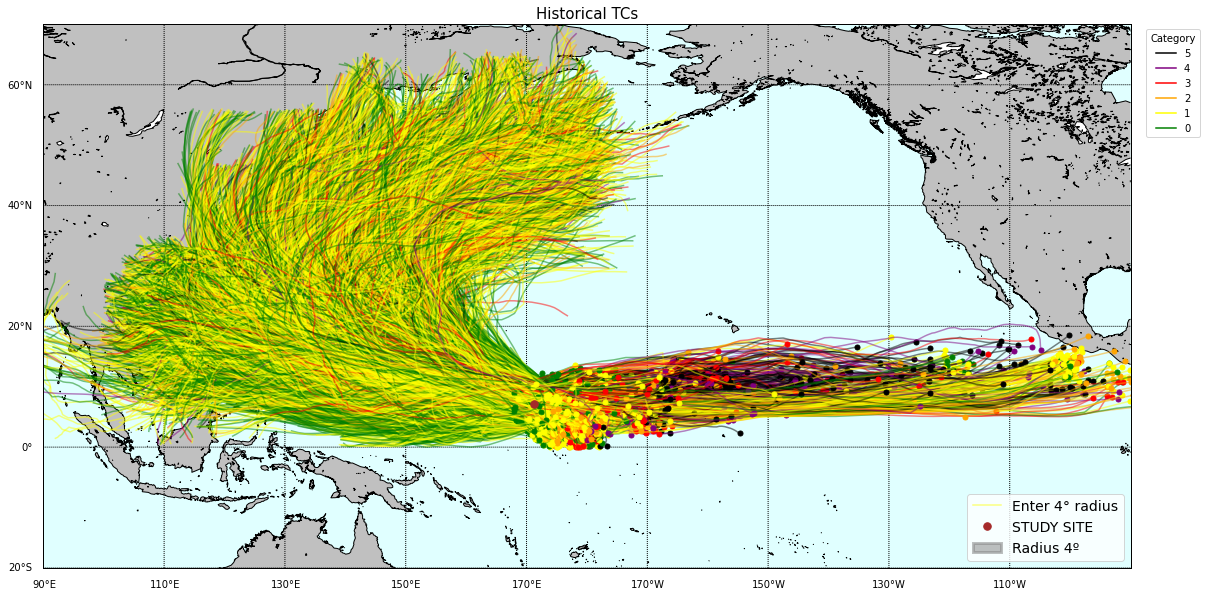

In [7]:
# Plot storm tracks category world map (requires basemap)

lon1, lon2 = 90, 270
lat1, lat2 = -20, 70

# r1
Plot_TCs_SimTracks_Category(
    TCs_r2_sim_tracks, TCs_r2_sim_params.category,
    lon1, lon2, lat1, lat2,
    pnt_lon, pnt_lat, r2,
);
